<a href="https://colab.research.google.com/github/losemeke/Data-Cleaning/blob/main/Data%20Exploration%3A%20Cars%20%26%20CO2%20Emissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Exploration: Cars & CO2 Emissions**

In [1]:
import pandas as pd

df = pd.read_csv('/content/MY2022 Fuel Consumption Ratings.csv')
df.head()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


In [2]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 946 entries, 0 to 945
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Model Year                         946 non-null    int64  
 1   Make                               946 non-null    object 
 2   Model                              946 non-null    object 
 3   Vehicle Class                      946 non-null    object 
 4   Engine Size(L)                     946 non-null    float64
 5   Cylinders                          946 non-null    int64  
 6   Transmission                       946 non-null    object 
 7   Fuel Type                          946 non-null    object 
 8   Fuel Consumption (City (L/100 km)  946 non-null    float64
 9   Fuel Consumption(Hwy (L/100 km))   946 non-null    float64
 10  Fuel Consumption(Comb (L/100 km))  946 non-null    float64
 11  Fuel Consumption(Comb (mpg))       946 non-null    int64  

No missing values and all column data types make sense.

In [3]:
df.describe()

,Model Year,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
count,946.0,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000
mean,2022.0,3.198732,5.668076,12.506448,9.363319,11.092072,27.247357,259.172304,4.539112,4.950317
std,0.0,1.374814,1.932670,3.452043,2.285125,2.876276,7.685217,64.443149,1.471799,1.679842
min,2022.0,1.200000,3.000000,4.000000,3.900000,4.000000,11.000000,94.000000,1.000000,1.000000
25%,2022.0,2.000000,4.000000,10.200000,7.700000,9.100000,22.000000,213.250000,3.000000,3.000000
50%,2022.0,3.000000,6.000000,12.200000,9.200000,10.800000,26.000000,257.000000,5.000000,5.000000
75%,2022.0,3.800000,6.000000,14.700000,10.700000,12.900000,31.000000,300.750000,5.000000,6.000000
max,2022.0,8.000000,16.000000,30.300000,20.900000,26.100000,71.000000,608.000000,10.000000,7.000000


The model year is 2022 for every vehicle, so the column can be dropped.

In [4]:
# Drop model year column
df.drop(['Model Year'], axis=1, inplace=True)

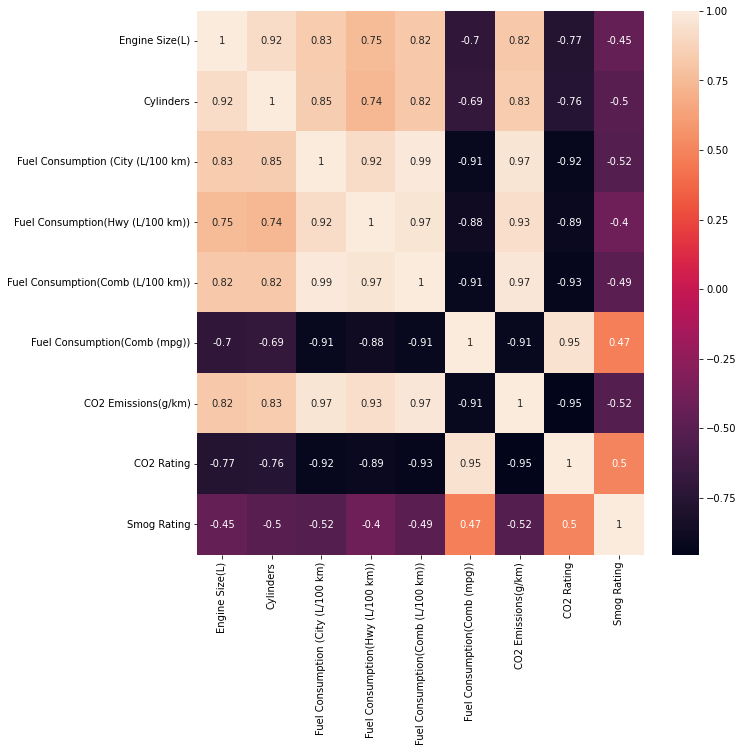

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation between variables
cor = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cor, annot=True)
plt.show()

CO2 emissions is highly positively correlated to engine size and cylinders: The bigger the engine size and the higher the cylinder value, the higher the CO2 emission. It is also a given that fuel consumption has a very high positive correlation with CO2 emissions.

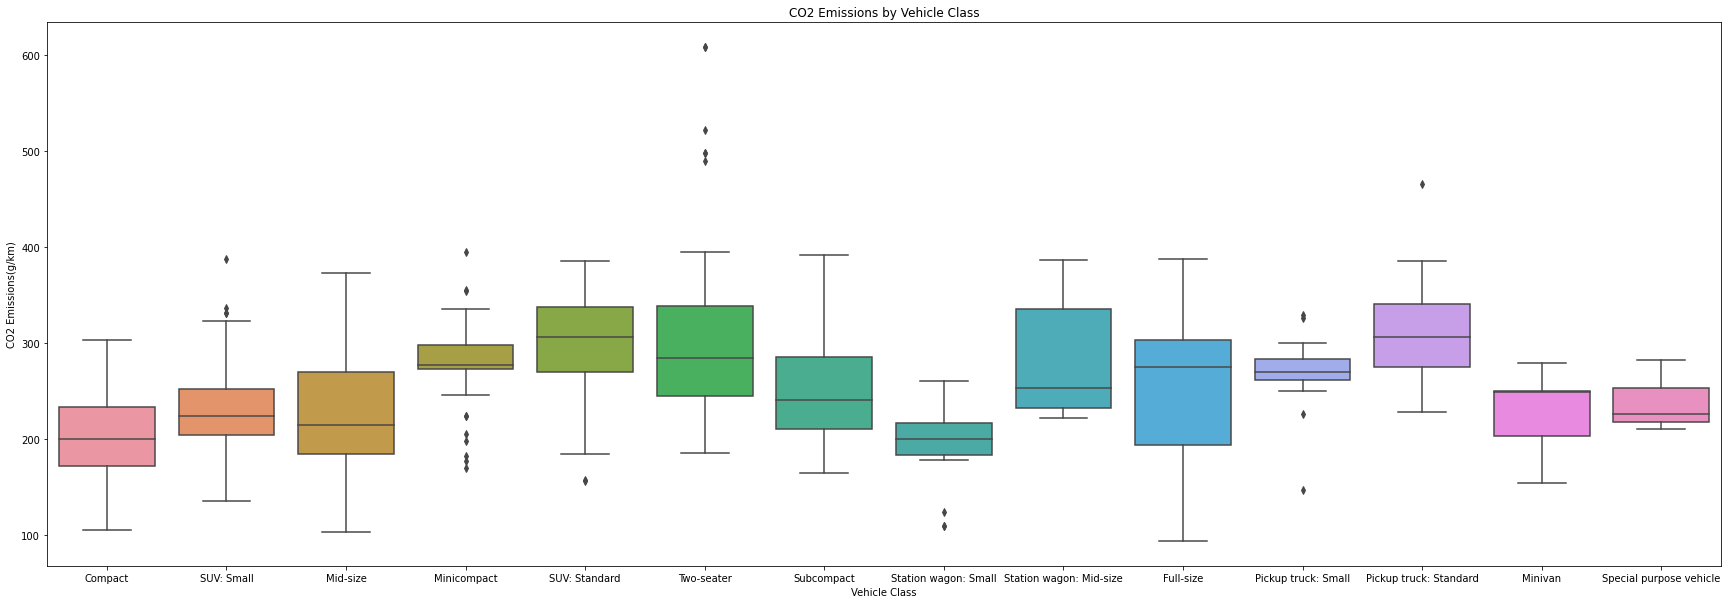

In [6]:
# Boxplot of CO2 emissions by vehicle class
plt.figure(figsize=(30,10))
sns.boxplot(x='Vehicle Class', y='CO2 Emissions(g/km)', data=df)
plt.title('CO2 Emissions by Vehicle Class')
plt.show()

On average, standard SUVs and pickup trucks have higher CO2 emissions than other vehicle classes, while compact cars, on average, have lower CO2 emissions. It also shows that two-seaters have very high outliers.

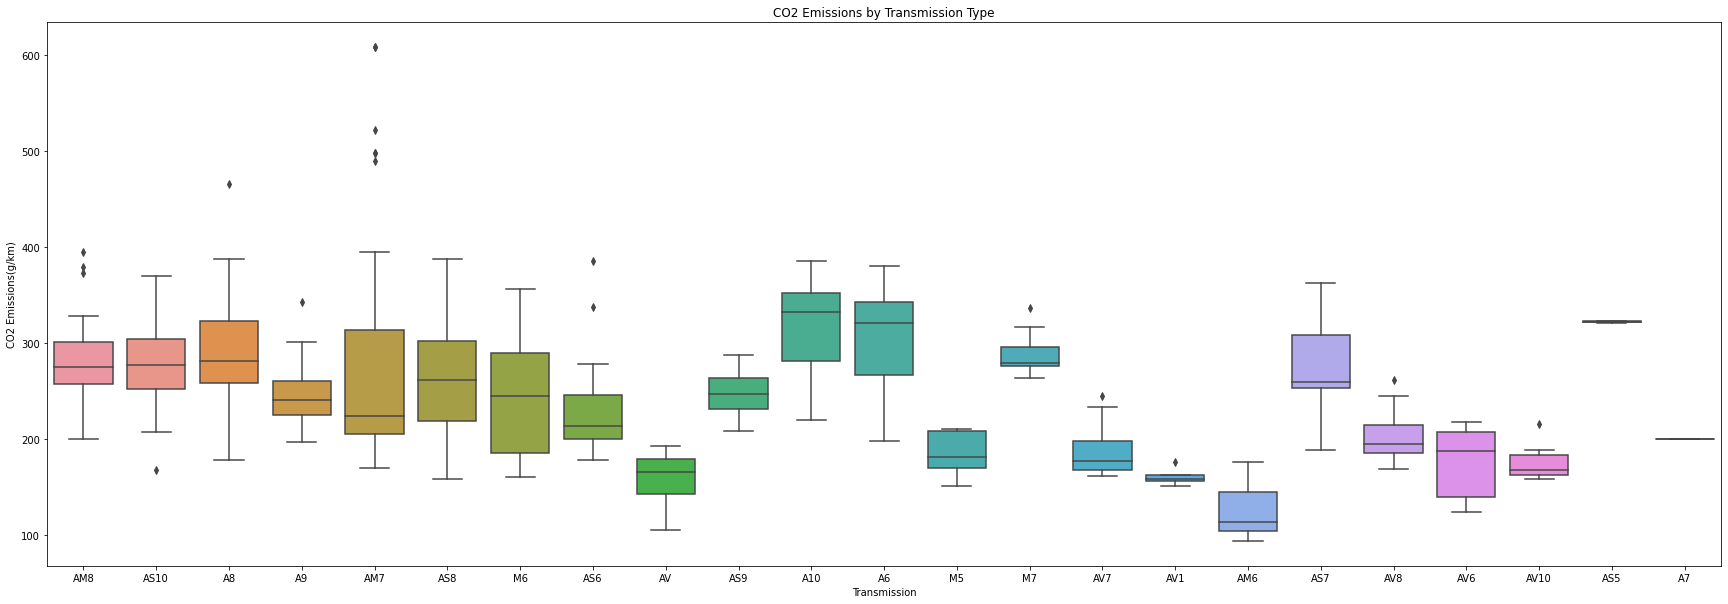

In [7]:
# Boxplot of CO2 emissions by vehicle class
plt.figure(figsize=(30,10))
sns.boxplot(x='Transmission', y='CO2 Emissions(g/km)', data=df)
plt.title('CO2 Emissions by Transmission Type')
plt.show()

A10 transmission tend to be linked to higher CO2 emissions, while AM6 transmission tend to be linked to lower CO2 emissions.

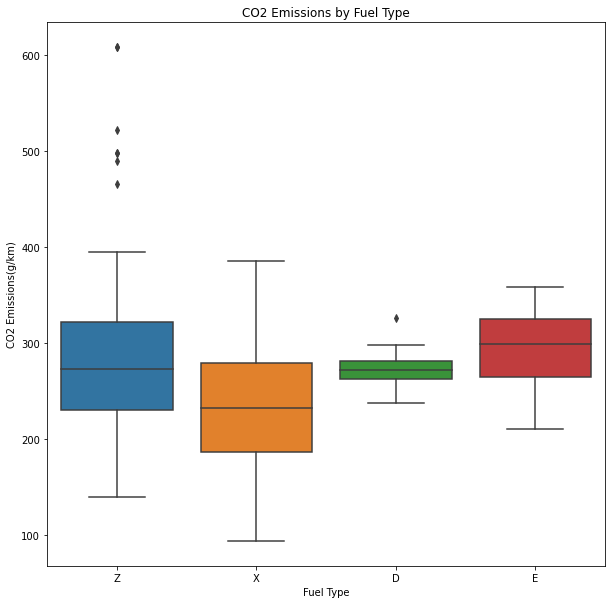

In [8]:
# Boxplot of CO2 emissions by vehicle class
plt.figure(figsize=(10,10))
sns.boxplot(x='Fuel Type', y='CO2 Emissions(g/km)', data=df)
plt.title('CO2 Emissions by Fuel Type')
plt.show()

Fuel type E tend to be linked to higher CO2 emissions, followed by fuel type Z, which is also more varied than fuel type E. Fuel type X tend to be linked to lower CO2 emissions.

In [9]:
# Average CO2 emissions of car makes, sorted from most to least
df.groupby('Make')['CO2 Emissions(g/km)'].mean().sort_values(ascending=False)

Make
Bugatti          579.333333
Lamborghini      418.875000
Rolls-Royce      385.285714
Bentley          342.875000
GMC              310.555556
Dodge            308.761905
Maserati         307.307692
Aston Martin     306.400000
Land Rover       303.000000
Chevrolet        294.462500
Ram              289.250000
Porsche          287.311688
Jaguar           282.500000
BMW              276.116667
Ford             271.426966
Genesis          266.250000
Jeep             266.235294
Chrysler         261.000000
Infiniti         260.625000
Cadillac         260.307692
Lincoln          259.571429
Audi             251.911111
Mercedes-Benz    243.511628
Acura            239.375000
Alfa Romeo       237.500000
Lexus            230.071429
FIAT             221.000000
Volvo            219.416667
Buick            217.111111
Subaru           211.947368
Volkswagen       210.388889
Nissan           206.391304
Toyota           200.803922
Mazda            198.391304
Kia              194.200000
Mitsubishi     

The top 4 car makes are all super luxury cars, while the bottom 4 are all non-luxury cars. There are only 3 non-luxury car makes in the top 10. For example, GMC, a non-luxury car make, ranks high because they focus on making SUVs and pickup trucks, which are vehicle classes found to have higher CO2 emissions on average.

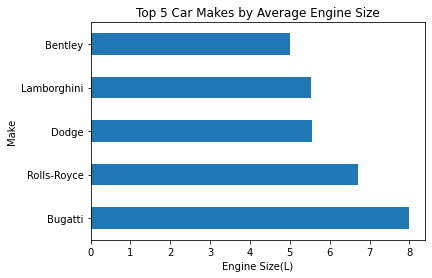

In [10]:
# Bar graph of the top 5 highest average engine size of car makes 
esize = df.groupby('Make')['Engine Size(L)'].mean().sort_values(ascending=False).head().plot.barh()
plt.title('Top 5 Car Makes by Average Engine Size')
plt.xlabel('Engine Size(L)')
plt.show()

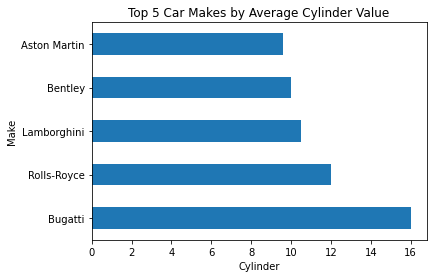

In [11]:
# Bar graph of the top 5 highest average cylinder value of car makes 
df.groupby('Make')['Cylinders'].mean().sort_values(ascending=False).head().plot.barh()
plt.title('Top 5 Car Makes by Average Cylinder Value')
plt.xlabel('Cylinder')
plt.show()

The above two graphs show that super luxury cars tend to have bigger engine sizes and cylinder values. This ties our earlier findings together: (1) engine size and cylinder values are highly positively correlated to CO2 emissions and (2) super luxury cars have the highest CO2 emissions. 

**Conclusion**

If you want to be more eco-friendly with cars released in 2022, then the car to aim for should have the following properties:
*   Compact
*   Small engine size 
*  Low cylinder value
* AM6 transmission
* Fuel type X

Avoid super luxury cars, SUVs, and pickup trucks.



# **Activity 1: Line Graph**

A line graph is not the best way to represent our data because our dataset only contains cars that came out in 2022. Since there isn't any trend to explore in out dataset, we opted for a bar graph, instead.

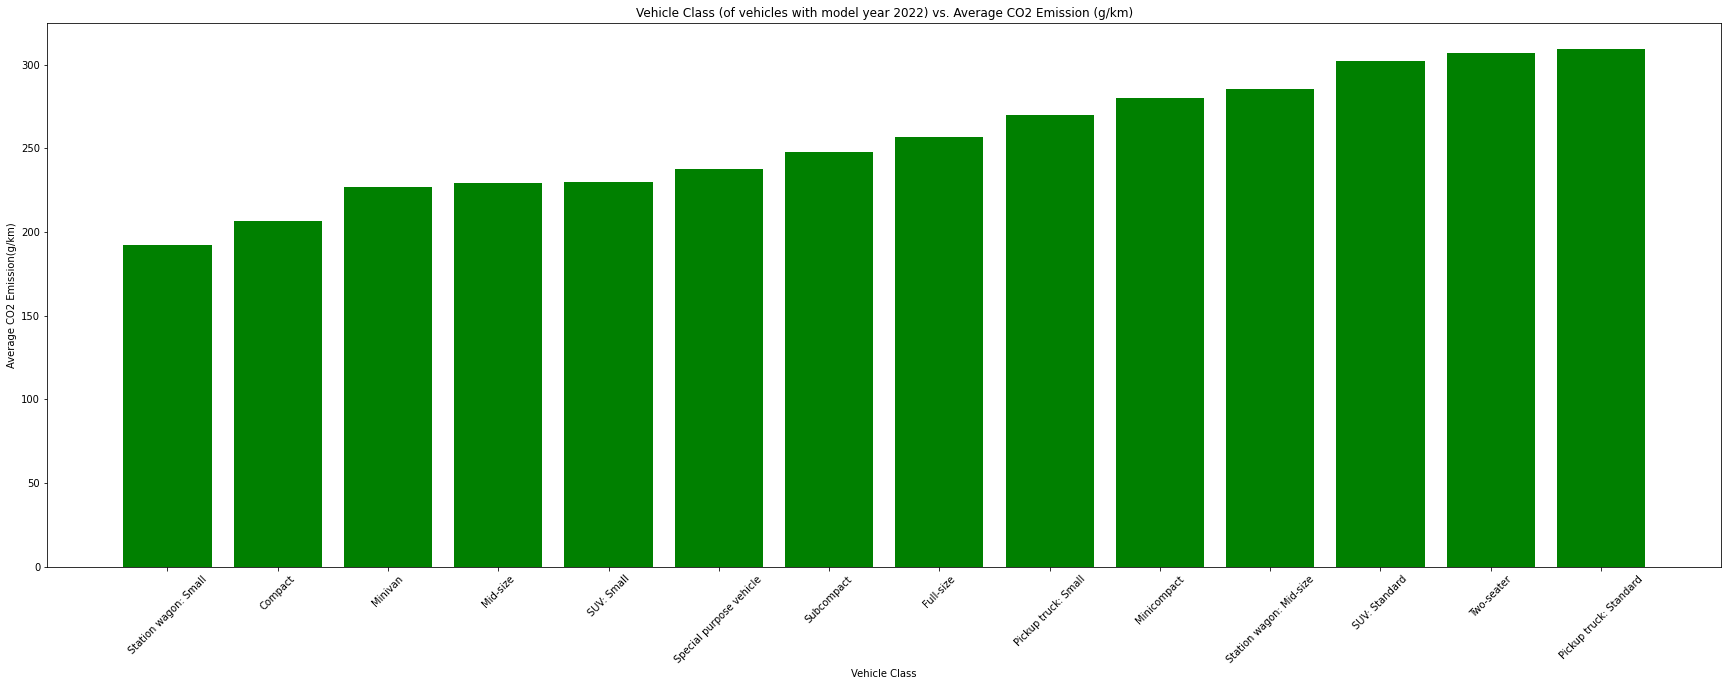

In [12]:
df2 = df.groupby('Vehicle Class')['CO2 Emissions(g/km)'].mean().sort_values().reset_index()
plt.figure(figsize=(30,10))
plt.bar(df2['Vehicle Class'], df2['CO2 Emissions(g/km)'], color='green')
plt.xticks(rotation = 45)
plt.title('Vehicle Class (of vehicles with model year 2022) vs. Average CO2 Emission (g/km)')
plt.xlabel('Vehicle Class')
plt.ylabel('Average CO2 Emission(g/km)')
plt.show()

# **Activity 2: Area Plot (New dataset: Total Cancer Deaths by Type)**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

df2 = pd.read_csv('/content/total-cancer-deaths-by-type.csv')
df2.head()

,Entity,Code,Year,Deaths - Liver cancer - Sex: Both - Age: All Ages (Number),Deaths - Kidney cancer - Sex: Both - Age: All Ages (Number),Deaths - Lip and oral cavity cancer - Sex: Both - Age: All Ages (Number),"Deaths - Tracheal, bronchus, and lung cancer - Sex: Both - Age: All Ages (Number)",Deaths - Larynx cancer - Sex: Both - Age: All Ages (Number),Deaths - Gallbladder and biliary tract cancer - Sex: Both - Age: All Ages (Number),Deaths - Malignant skin melanoma - Sex: Both - Age: All Ages (Number),...,Deaths - Brain and central nervous system cancer - Sex: Both - Age: All Ages (Number),Deaths - Non-Hodgkin lymphoma - Sex: Both - Age: All Ages (Number),Deaths - Pancreatic cancer - Sex: Both - Age: All Ages (Number),Deaths - Esophageal cancer - Sex: Both - Age: All Ages (Number),Deaths - Testicular cancer - Sex: Both - Age: All Ages (Number),Deaths - Nasopharynx cancer - Sex: Both - Age: All Ages (Number),Deaths - Other pharynx cancer - Sex: Both - Age: All Ages (Number),Deaths - Colon and rectum cancer - Sex: Both - Age: All Ages (Number),Deaths - Non-melanoma skin cancer - Sex: Both - Age: All Ages (Number),Deaths - Mesothelioma - Sex: Both - Age: All Ages (Number)
0,Afghanistan,AFG,1990,851,66,89,983,260,180,47,...,422,996,138,529,3,66,37,539,25,6
1,Afghanistan,AFG,1991,866,66,89,982,263,182,48,...,438,1010,137,535,4,67,37,542,26,7
2,Afghanistan,AFG,1992,890,68,91,989,268,185,51,...,472,1040,137,546,4,69,38,550,26,7
3,Afghanistan,AFG,1993,914,70,93,995,275,189,53,...,505,1062,139,560,5,72,39,555,27,7
4,Afghanistan,AFG,1994,933,71,94,996,282,193,54,...,526,1069,140,575,5,73,39,554,28,8


In [ ]:
# Clean headers
new_col = []
for c in df2.columns:
  if ' - Sex: Both - Age: All Ages (Number)' in c:
    cleaned = c.replace(' - Sex: Both - Age: All Ages (Number)', '')
    new_col.append(cleaned)
  else:
    new_col.append(c)

df2.columns = new_col
df2.head()

,Entity,Code,Year,Deaths - Liver cancer,Deaths - Kidney cancer,Deaths - Lip and oral cavity cancer,"Deaths - Tracheal, bronchus, and lung cancer",Deaths - Larynx cancer,Deaths - Gallbladder and biliary tract cancer,Deaths - Malignant skin melanoma,...,Deaths - Brain and central nervous system cancer,Deaths - Non-Hodgkin lymphoma,Deaths - Pancreatic cancer,Deaths - Esophageal cancer,Deaths - Testicular cancer,Deaths - Nasopharynx cancer,Deaths - Other pharynx cancer,Deaths - Colon and rectum cancer,Deaths - Non-melanoma skin cancer,Deaths - Mesothelioma
0,Afghanistan,AFG,1990,851,66,89,983,260,180,47,...,422,996,138,529,3,66,37,539,25,6
1,Afghanistan,AFG,1991,866,66,89,982,263,182,48,...,438,1010,137,535,4,67,37,542,26,7
2,Afghanistan,AFG,1992,890,68,91,989,268,185,51,...,472,1040,137,546,4,69,38,550,26,7
3,Afghanistan,AFG,1993,914,70,93,995,275,189,53,...,505,1062,139,560,5,72,39,555,27,7
4,Afghanistan,AFG,1994,933,71,94,996,282,193,54,...,526,1069,140,575,5,73,39,554,28,8


In [ ]:
df2.describe()

,Year,Deaths - Liver cancer,Deaths - Kidney cancer,Deaths - Lip and oral cavity cancer,"Deaths - Tracheal, bronchus, and lung cancer",Deaths - Larynx cancer,Deaths - Gallbladder and biliary tract cancer,Deaths - Malignant skin melanoma,Deaths - Leukemia,Deaths - Hodgkin lymphoma,...,Deaths - Brain and central nervous system cancer,Deaths - Non-Hodgkin lymphoma,Deaths - Pancreatic cancer,Deaths - Esophageal cancer,Deaths - Testicular cancer,Deaths - Nasopharynx cancer,Deaths - Other pharynx cancer,Deaths - Colon and rectum cancer,Deaths - Non-melanoma skin cancer,Deaths - Mesothelioma
count,8010.000000,8010.000000,8010.000000,8010.000000,8.010000e+03,8010.000000,8010.000000,8010.000000,8010.000000,8010.000000,...,8010.000000,8010.000000,8010.000000,8010.000000,8010.000000,8010.000000,8010.000000,8.010000e+03,8010.000000,8010.000000
mean,2004.500000,15941.000624,4610.941199,5346.948814,5.891005e+04,3844.437079,4986.568414,1947.733708,11190.691261,1010.150312,...,7276.988514,7261.110861,13359.342821,16065.139950,327.085768,2253.922222,2965.132584,3.027388e+04,1434.322472,914.333583
std,8.655982,55089.953210,13808.207577,16321.642622,1.807509e+05,10907.603041,14733.778028,5868.243072,30798.338572,2704.259457,...,20865.059840,20605.812531,40695.697306,55721.404874,899.145012,7680.016855,9942.849790,8.959821e+04,4307.364997,2806.910333
min,1990.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,1997.000000,60.000000,21.000000,29.000000,2.222500e+02,26.000000,20.000000,8.000000,92.000000,7.000000,...,40.000000,46.000000,57.000000,50.000000,2.000000,7.000000,9.000000,1.430000e+02,7.000000,3.000000
50%,2004.500000,341.500000,147.000000,131.000000,1.428500e+03,136.500000,127.000000,69.000000,494.500000,46.000000,...,281.500000,292.000000,380.500000,366.500000,12.000000,43.000000,52.000000,9.415000e+02,46.000000,17.000000
75%,2012.000000,3105.750000,1465.250000,1365.250000,1.425775e+04,1238.500000,1482.000000,654.500000,3879.000000,314.000000,...,2292.750000,2304.500000,3814.750000,2851.500000,126.000000,450.000000,589.750000,8.856750e+03,491.000000,276.750000
max,2019.000000,484577.000000,166438.000000,199398.000000,2.042640e+06,123356.000000,172441.000000,62844.000000,334592.000000,27839.000000,...,246253.000000,254614.000000,531107.000000,498067.000000,10842.000000,71610.000000,114207.000000,1.085797e+06,56054.000000,29251.000000


In [ ]:
# Select for world total death counts 
df2 = df2.loc[df2['Entity'] == 'World']
df2.head()

,Entity,Code,Year,Deaths - Liver cancer,Deaths - Kidney cancer,Deaths - Lip and oral cavity cancer,"Deaths - Tracheal, bronchus, and lung cancer",Deaths - Larynx cancer,Deaths - Gallbladder and biliary tract cancer,Deaths - Malignant skin melanoma,...,Deaths - Brain and central nervous system cancer,Deaths - Non-Hodgkin lymphoma,Deaths - Pancreatic cancer,Deaths - Esophageal cancer,Deaths - Testicular cancer,Deaths - Nasopharynx cancer,Deaths - Other pharynx cancer,Deaths - Colon and rectum cancer,Deaths - Non-melanoma skin cancer,Deaths - Mesothelioma
7770,World,OWID_WRL,1990,365215,72100,96628,1065139,87459,94855,33083,...,139632,126082,198051,319332,7224,53459,51460,518126,23222,15385
7771,World,OWID_WRL,1991,382764,74404,98834,1088143,88942,96277,33917,...,142244,129980,204106,327023,7249,54291,52783,529699,23727,15658
7772,World,OWID_WRL,1992,399662,77063,101317,1113920,90438,97868,34917,...,144947,134170,210632,334099,7294,54840,54209,543017,24364,15999
7773,World,OWID_WRL,1993,417329,80477,104920,1151283,92949,99796,36352,...,148272,139426,219883,342837,7356,55436,56111,562393,25042,16421
7774,World,OWID_WRL,1994,435088,83173,108120,1176758,94573,101199,37489,...,151631,144043,226459,348242,7467,55811,57745,575487,25606,16753


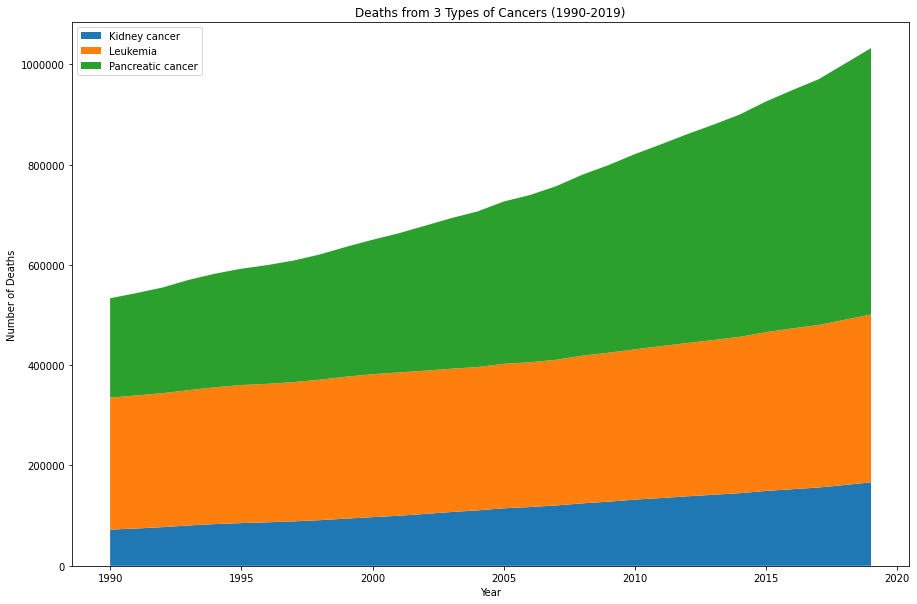

In [ ]:
# Matplotlib
plt.figure(figsize=(15,10))
plt.stackplot(df2['Year'], df2['Deaths - Kidney cancer'], df2['Deaths - Leukemia'], df2['Deaths - Pancreatic cancer'], labels=['Kidney cancer', 'Leukemia', 'Pancreatic cancer'])
plt.title('Deaths from 3 Types of Cancers (1990-2019)')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.legend(loc='upper left')
plt.ticklabel_format(style = 'plain')
plt.show()

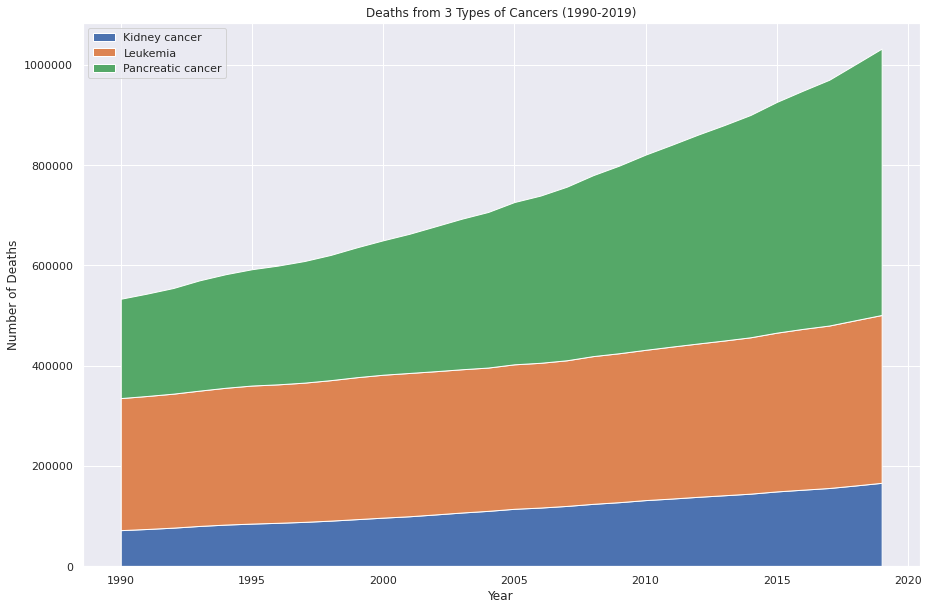

In [ ]:
# Seaborn
sns.set_theme()
plt.figure(figsize=(15,10))
plt.stackplot(df2['Year'], df2['Deaths - Kidney cancer'], df2['Deaths - Leukemia'], df2['Deaths - Pancreatic cancer'], labels=['Kidney cancer', 'Leukemia', 'Pancreatic cancer'])
plt.title('Deaths from 3 Types of Cancers (1990-2019)')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.legend(loc='upper left')
plt.ticklabel_format(style = 'plain')
plt.show()

In [ ]:
# Plotly (express) 

# Cleaning headers for the restructuring of dataset
new_col2 = []
for c in df2.columns:
  cleaned = c.replace('Deaths - ', '')
  new_col2.append(cleaned)
df2.columns = new_col2

# Restructuring of dataset
melt1 = pd.melt(df2, id_vars='Year', value_vars=df2.columns[3:], var_name='Cancer Type', value_name='Deaths')
melt1.head()

,Year,Cancer Type,Deaths
0,1990,Liver cancer,365215
1,1991,Liver cancer,382764
2,1992,Liver cancer,399662
3,1993,Liver cancer,417329
4,1994,Liver cancer,435088


In [ ]:
types3 = melt1.loc[melt1['Cancer Type'].isin(['Kidney cancer', 'Leukemia', 'Pancreatic cancer'])]
fig = px.area(types3, x='Year', y='Deaths', color='Cancer Type', title='Deaths from 3 Types of Cancers (1990-2019)')
fig.show()

In [ ]:
# Graph for all cancer types
fig = px.area(melt1, x='Year', y='Deaths', color='Cancer Type', title='Deaths from Cancer by Type (1990-2019)')
fig.show()

# **Activity 3: Word Clouds**

In [ ]:
df2['Total'] = df2[list(df2.columns[3:])].sum(axis=1)

In [ ]:
df2.head()

,Entity,Code,Year,Deaths - Liver cancer,Deaths - Kidney cancer,Deaths - Lip and oral cavity cancer,"Deaths - Tracheal, bronchus, and lung cancer",Deaths - Larynx cancer,Deaths - Gallbladder and biliary tract cancer,Deaths - Malignant skin melanoma,...,Deaths - Non-Hodgkin lymphoma,Deaths - Pancreatic cancer,Deaths - Esophageal cancer,Deaths - Testicular cancer,Deaths - Nasopharynx cancer,Deaths - Other pharynx cancer,Deaths - Colon and rectum cancer,Deaths - Non-melanoma skin cancer,Deaths - Mesothelioma,Total
0,Afghanistan,AFG,1990,851,66,89,983,260,180,47,...,996,138,529,3,66,37,539,25,6,10386
1,Afghanistan,AFG,1991,866,66,89,982,263,182,48,...,1010,137,535,4,67,37,542,26,7,10558
2,Afghanistan,AFG,1992,890,68,91,989,268,185,51,...,1040,137,546,4,69,38,550,26,7,10894
3,Afghanistan,AFG,1993,914,70,93,995,275,189,53,...,1062,139,560,5,72,39,555,27,7,11241
4,Afghanistan,AFG,1994,933,71,94,996,282,193,54,...,1069,140,575,5,73,39,554,28,8,11484


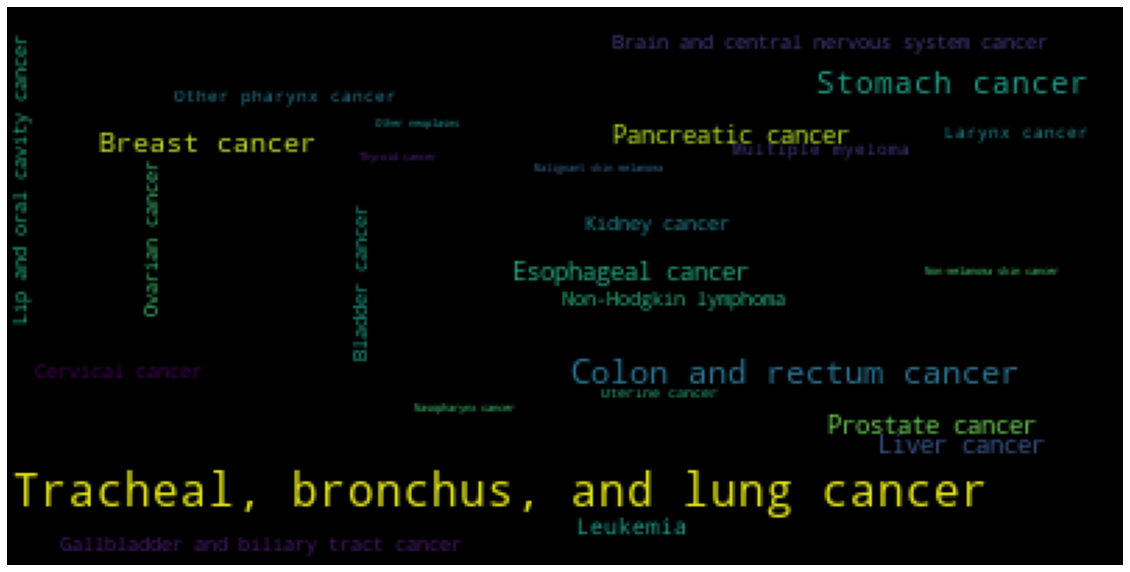

In [ ]:
from wordcloud import WordCloud, get_single_color_func

data = dict(zip(melt1['Cancer Type'], melt1['Deaths']))
wc = WordCloud().generate_from_frequencies(data)
plt.figure(figsize=(20,15))
plt.imshow(wc)
plt.axis('off')
plt.show()


In [ ]:
df3 = pd.read_csv('/content/trump_insult_tweets_2014_to_2021.csv')
df3.head()

,Unnamed: 0,date,target,insult,tweet
0,1,2014-10-09,thomas-frieden,fool,"Can you believe this fool, Dr. Thomas Frieden ..."
1,2,2014-10-09,thomas-frieden,DOPE,"Can you believe this fool, Dr. Thomas Frieden ..."
2,3,2015-06-16,politicians,all talk and no action,Big time in U.S. today - MAKE AMERICA GREAT AG...
3,4,2015-06-24,ben-cardin,It's politicians like Cardin that have destroy...,Politician @SenatorCardin didn't like that I s...
4,5,2015-06-24,neil-young,total hypocrite,"For the nonbeliever, here is a photo of @Neily..."


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10360 entries, 0 to 10359
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10360 non-null  int64 
 1   date        10360 non-null  object
 2   target      10358 non-null  object
 3   insult      10360 non-null  object
 4   tweet       10360 non-null  object
dtypes: int64(1), object(4)
memory usage: 404.8+ KB


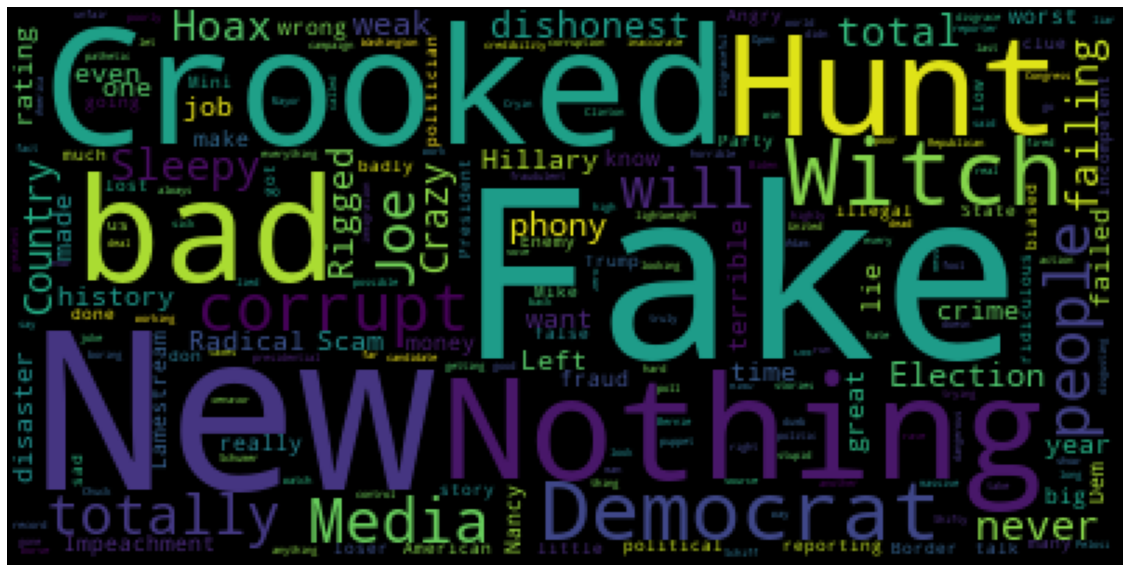

In [ ]:
text = ' '.join(w for w in df3.insult)
wc2 = WordCloud(collocations = False).generate(text)
plt.figure(figsize=(20,15))
plt.imshow(wc2)
plt.axis('off')
plt.show()